<a href="https://colab.research.google.com/github/rahavi-r31/project-AnalyzingExoplanetsusingTransitFinderData/blob/main/TransitAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-6-0cb678943982>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr(method = 'pearson')


[[ 1.         -0.07369185]
 [-0.07369185  1.        ]]


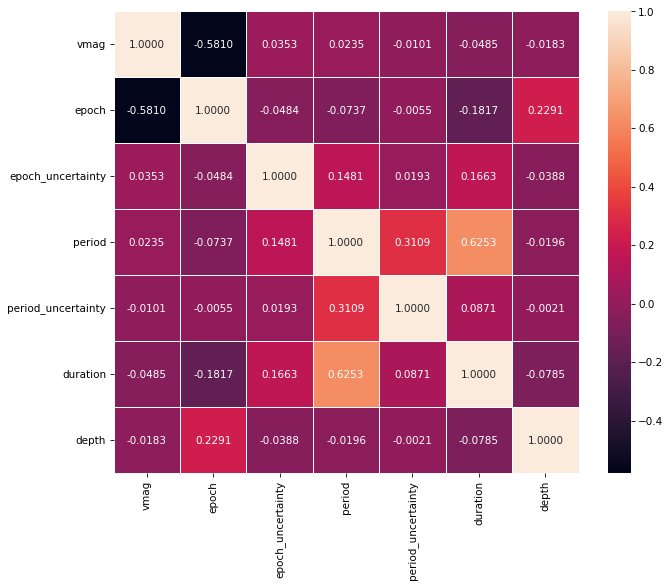

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("/content/transit_targets.csv")
corr=df.corr(method = 'pearson')
c = np.corrcoef(df['epoch'],df['period'])
print(c)
plt.figure(figsize=(10,8), dpi =75)
sns.heatmap(corr,annot=True,fmt=".4f", linewidth=.5)
plt.show()


In [ ]:
from datetime import datetime

# Get the current date and time
current_datetime = datetime.utcnow()

# Calculate the Julian Date (JD)
A = current_datetime.year // 100
B = 2 - A + current_datetime.year // 400
C = 365.25 * (current_datetime.year + 4716)
D = 30.6001 * (current_datetime.month + 1)

julian_date = B + current_datetime.day + (C + D) - 1524.5

print("Today's Julian Date:", julian_date)


Today's Julian Date: 2460255.4512


In [ ]:
# Given data
last_transit_epoch = 2458326.099  # Example last transit epoch in Julian Date (JD)
period = 17.14012  # Example orbital period in days
period_uncertainty = 0.00006  # Example uncertainty in orbital period (days)
time_since_last_transit = 2460254.4512- last_transit_epoch  # Example time since last transit in JD

# Calculate the number of orbits completed (both lower and upper limits)
lower_limit_orbits = time_since_last_transit / \
 (period + period_uncertainty)
upper_limit_orbits = time_since_last_transit / \
 (period - period_uncertainty)

# Calculate the range of possible next transit epochs
next_transit_epoch_lower = last_transit_epoch + \
 (lower_limit_orbits * period)
next_transit_epoch_upper = last_transit_epoch + \
 (upper_limit_orbits * period)

# Print the results
print(f"Lower Limit Orbits: {lower_limit_orbits}")
print(f"Upper Limit Orbits: {upper_limit_orbits}")
print(f"Range of Possible Next Transit Epochs:")
print(f"Lower Limit: {next_transit_epoch_lower}")
print(f"Upper Limit: {next_transit_epoch_upper}")


Lower Limit Orbits: 112.50478116332974
Upper Limit Orbits: 112.50556882531808
Range of Possible Next Transit Epochs:
Lower Limit: 2460254.444449713
Upper Limit: 2460254.457950334


In [ ]:
import pandas as pd

# Load data from the Excel file
data = pd.read_excel("/content/toi_targets Final.xlsx")

# Get the relevant data from the Excel file
last_transit_epoch = data["epoch"].values[0]
period = data["period"].values[0]
period_uncertainty = data["period_uncertainty"].values[0]
time_since_last_transit = 2459324.678 - last_transit_epoch  # Example time since last transit in JD

# Calculate the number of orbits completed (both lower and upper limits)
lower_limit_orbits = time_since_last_transit / (period + period_uncertainty)
upper_limit_orbits = time_since_last_transit / (period - period_uncertainty)

# Calculate the range of possible next transit epochs
next_transit_epoch_lower = last_transit_epoch + (lower_limit_orbits * period)
next_transit_epoch_upper = last_transit_epoch + (upper_limit_orbits * period)

# Print the results
print(f"Lower Limit Orbits: {lower_limit_orbits}")
print(f"Upper Limit Orbits: {upper_limit_orbits}")
print(f"Range of Possible Next Transit Epochs:")
print(f"Lower Limit: {next_transit_epoch_lower}")
print(f"Upper Limit: {next_transit_epoch_upper}")


Lower Limit Orbits: 201.18842208162084
Upper Limit Orbits: 201.1886816800617
Range of Possible Next Transit Epochs:
Lower Limit: 2459324.6778143393
Upper Limit: 2459324.678185661


In [1]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/content/all_exoplanets_2021.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4575 entries, 0 to 4574
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   No.                            4575 non-null   int64  
 1   Planet Name                    4575 non-null   object 
 2   Planet Host                    4575 non-null   object 
 3   Num Stars                      4575 non-null   int64  
 4   Num Planets                    4575 non-null   int64  
 5   Discovery Method               4575 non-null   object 
 6   Discovery Year                 4575 non-null   int64  
 7   Discovery Facility             4575 non-null   object 
 8   Orbital Period Days            4413 non-null   float64
 9   Orbit Semi-Major Axis          2763 non-null   float64
 10  Mass                           2006 non-null   float64
 11  Eccentricity                   1707 non-null   float64
 12  Insolation Flux                370 non-null    f

In [6]:
df.shape

(4575, 23)

In [7]:
df.isnull().sum()

No.                                 0
Planet Name                         0
Planet Host                         0
Num Stars                           0
Num Planets                         0
Discovery Method                    0
Discovery Year                      0
Discovery Facility                  0
Orbital Period Days               162
Orbit Semi-Major Axis            1812
Mass                             2569
Eccentricity                     2868
Insolation Flux                  4205
Equilibrium Temperature          3650
Spectral Type                    3647
Stellar Effective Temperature     349
Stellar Radius                    447
Stellar Mass                      731
Stellar Metallicity              1371
Stellar Metallicity Ratio        1383
Stellar Surface Gravity           603
Distance                          104
Gaia Magnitude                    175
dtype: int64

In [8]:
planet_col = ['Planet Name','Num Stars','Num Planets','Discovery Method','Discovery Year','Discovery Facility','Orbital Period Days']
new_df = df[planet_col]
new_df.head()

,Planet Name,Num Stars,Num Planets,Discovery Method,Discovery Year,Discovery Facility,Orbital Period Days
0,11 Com b,2,1,Radial Velocity,2007,Xinglong Station,326.03000
1,11 UMi b,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,516.21997
2,14 And b,1,1,Radial Velocity,2008,Okayama Astrophysical Observatory,185.84000
3,14 Her b,1,2,Radial Velocity,2002,W. M. Keck Observatory,1773.40002
4,16 Cyg B b,3,1,Radial Velocity,1996,Multiple Observatories,798.50000


In [9]:
Star_count=new_df.sort_values(['Num Stars'], ascending = False)
Star_count=pd.DataFrame(Star_count)
Star_count=Star_count[0:10]
Star_count

,Planet Name,Num Stars,Num Planets,Discovery Method,Discovery Year,Discovery Facility,Orbital Period Days
4158,PH1 b,4,1,Transit,2012,Kepler,138.31700
19,30 Ari B b,4,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,335.10001
734,HD 207832 c,3,2,Radial Velocity,2012,W. M. Keck Observatory,1155.70000
957,HD 65216 c,3,2,Radial Velocity,2013,La Silla Observatory,5370.00000
244,GJ 667 C c,3,5,Radial Velocity,2011,La Silla Observatory,28.14000
243,GJ 667 C b,3,5,Radial Velocity,2011,La Silla Observatory,7.20040
666,HD 178911 B b,3,1,Radial Velocity,2001,W. M. Keck Observatory,71.48400
733,HD 207832 b,3,2,Radial Velocity,2012,W. M. Keck Observatory,160.07000
4017,LTT 1445 A b,3,1,Transit,2019,Transiting Exoplanet Survey Satellite (TESS),5.35882
354,HAT-P-8 b,3,1,Transit,2008,HATNet,3.07634


<Axes: xlabel='Planet Name'>

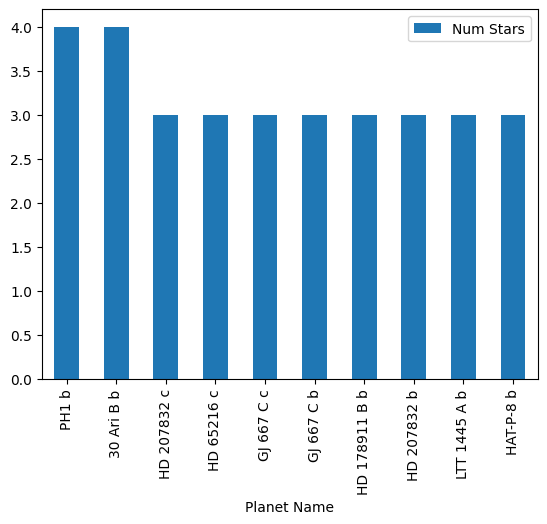

In [10]:
Star_count.plot.bar(x='Planet Name',y='Num Stars')

In [11]:
df1 = new_df["Discovery Method"].value_counts().reset_index()
df1.columns = ["Method", "Count"]
df1

,Method,Count
0,Transit,3444
1,Radial Velocity,899
2,Microlensing,120
3,Imaging,54
4,Transit Timing Variations,22
5,Eclipse Timing Variations,16
6,Orbital Brightness Modulation,9
7,Pulsar Timing,7
8,Pulsation Timing Variations,2
9,Astrometry,1


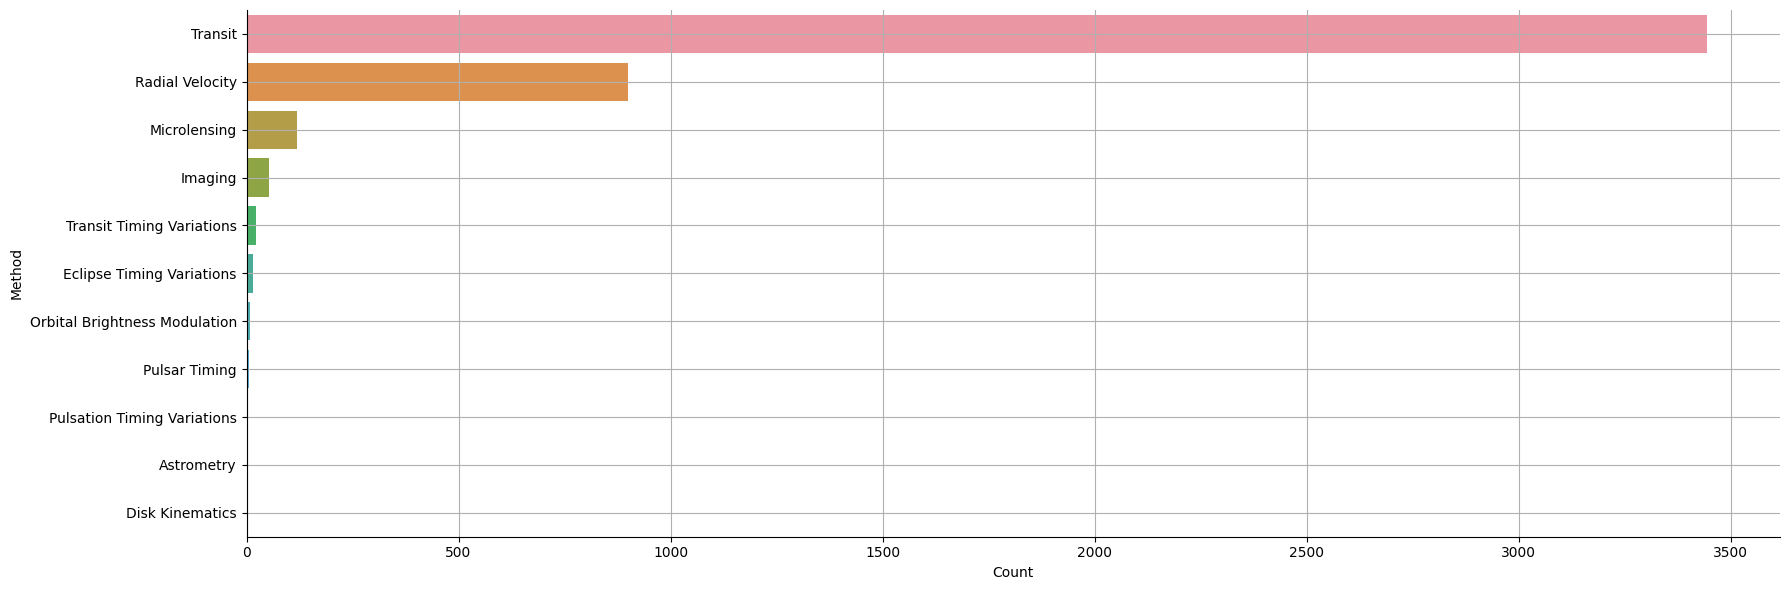

In [12]:
sns.catplot(x="Count", y="Method", kind="bar", data=df1, height=6, aspect=3)
plt.grid(True)

In [13]:
df1 = new_df["Discovery Year"].value_counts().reset_index()
df1.columns = ["Year", "Count"]
df1

,Year,Count
0,2016,1521
1,2014,872
2,2018,326
3,2020,232
4,2019,204
5,2021,193
6,2015,157
7,2017,153
8,2012,139
9,2011,138


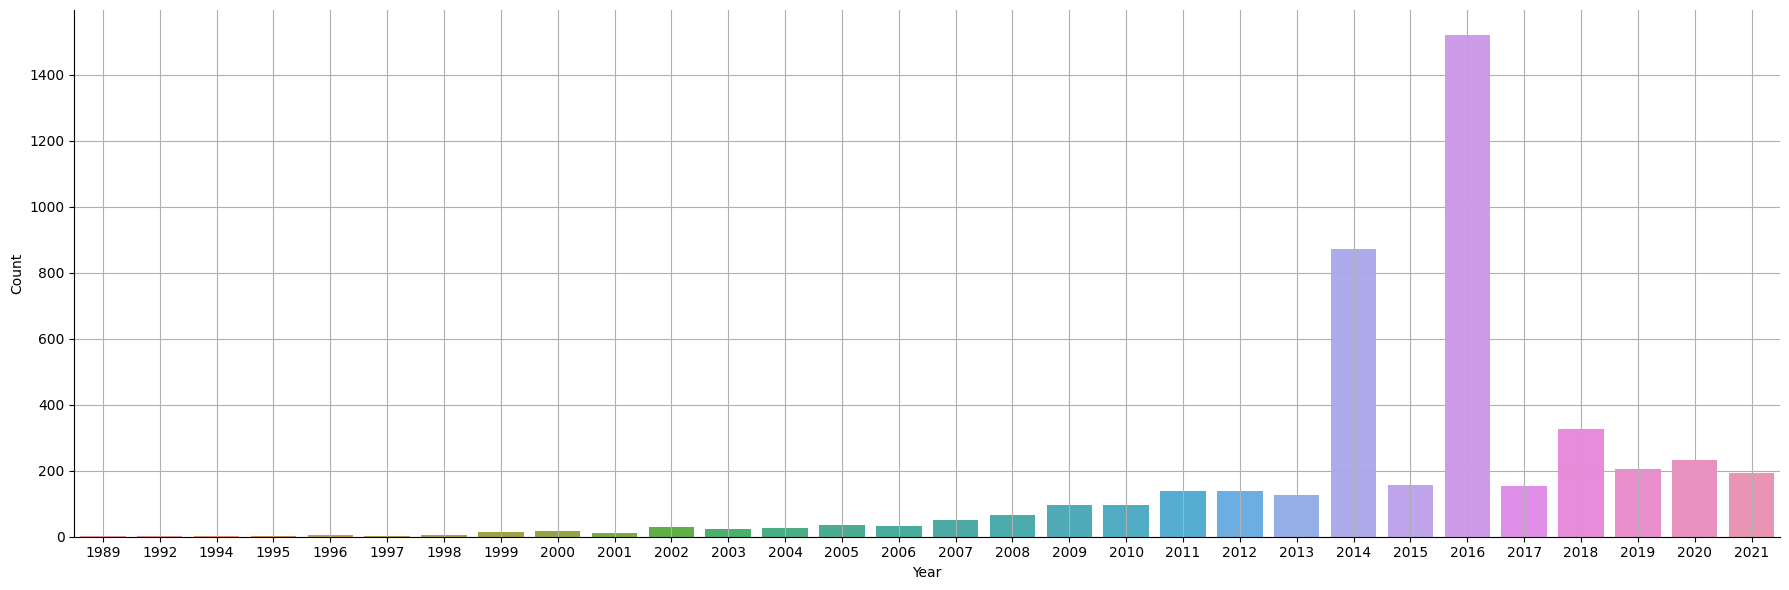

In [14]:
sns.catplot(y="Count", x="Year", kind="bar", data=df1, height=6, aspect=3)
plt.grid(True)

In [15]:
new_df['Discovery Facility'].value_counts()

Kepler                                     2402
K2                                          477
La Silla Observatory                        260
Multiple Observatories                      184
W. M. Keck Observatory                      181
                                           ... 
NASA Infrared Telescope Facility (IRTF)       1
Atacama Large Millimeter Array (ALMA)         1
Apache Point Observatory                      1
Oak Ridge Observatory                         1
Kitt Peak National Observatory                1
Name: Discovery Facility, Length: 63, dtype: int64

In [16]:
df1 = new_df["Discovery Facility"].value_counts()[0:10].reset_index()
df1.columns = ["Facility", "Count"]
df1

,Facility,Count
0,Kepler,2402
1,K2,477
2,La Silla Observatory,260
3,Multiple Observatories,184
4,W. M. Keck Observatory,181
5,Transiting Exoplanet Survey Satellite (TESS),172
6,SuperWASP,113
7,OGLE,74
8,HATSouth,69
9,HATNet,67


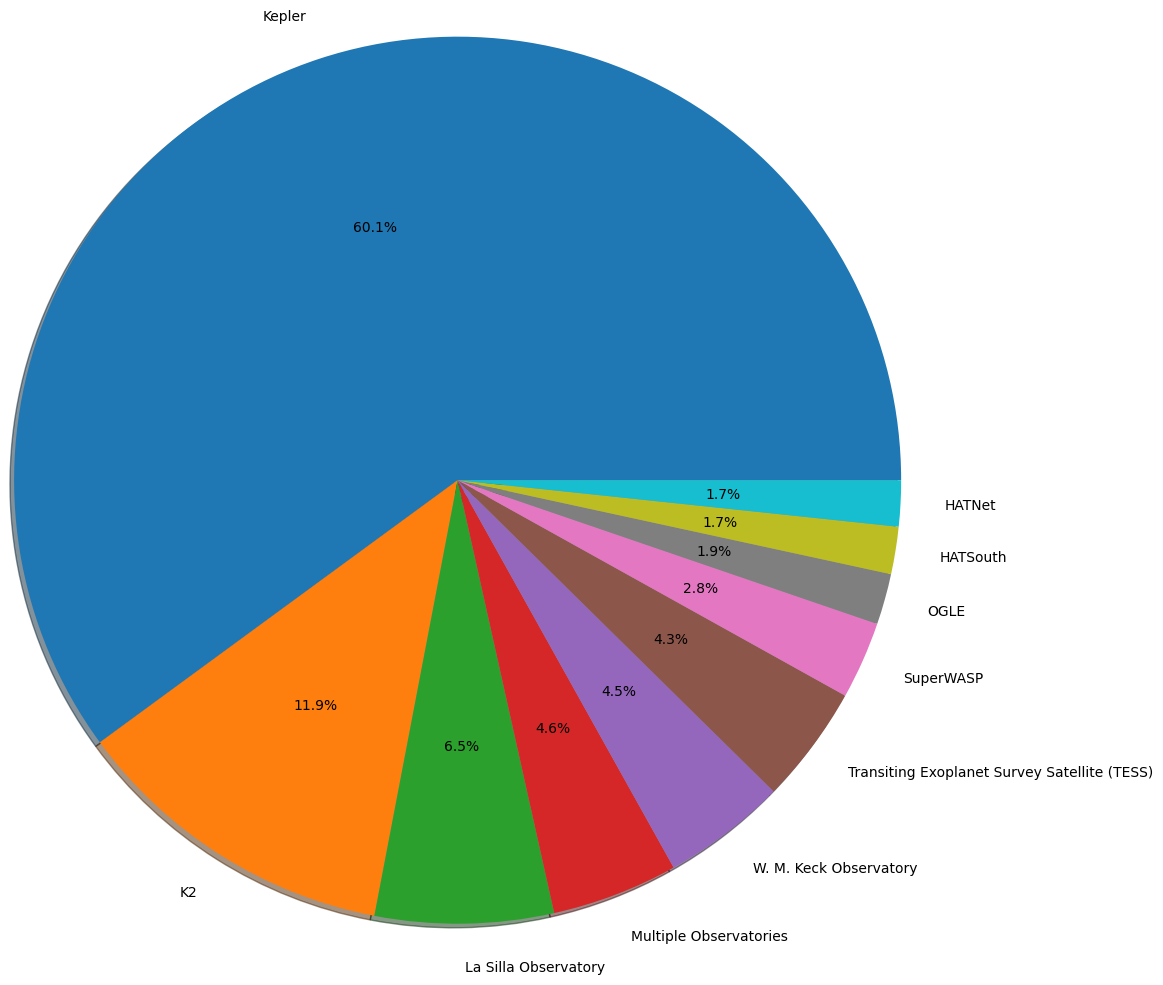

In [17]:
plt.pie(df1['Count'],labels = df1['Facility'],autopct='%1.1f%%',radius=3,shadow=True)
plt.show()